# EDA

The first most important step in data analysis is to perform a exploratory data analysis (EDA). EDA involves inspecting for null and duplicate values, data preprocessing, assessing distribution of each variable and identifying simple trends between variables. Depending on the complexity of the datasets, data scientists can spend between 50%-90% of the time performing EDA, to ensure that the data is properly processed for further in-depth analysis.

EDA is useful is when deciding on the appropriate statistics to use. Importantly, the statistical tests used for variables with Gaussian distribution will be different from another dataset where the distribution may be skewed.

Finally, the strength of correlation between different variables can provide insights for machine learning, where features with poor correlation or almost prefect correlation can be removed from further analysis.

Overall, EDA provides critical insights into the general structure and characteristics of the dataset, which will be useful for further downstream analysis and machine learning.

### An EDA checklist
If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset.

#### An EDA checklist
1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have and how do you treat different types?
3. What’s missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv(r'WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
df.head() #first 5 rows

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
#last 10 row
df.tail(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


## General description

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.shape

(1470, 35)

In [ ]:
df.describe() #numercial

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.describe(include=['object'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [ ]:
df.describe(include=['bool','object'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df.columns.str.strip()
#The str.strip() function is used to remove leading and trailing characters.
#Strip whitespaces (including newlines)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### What kind of data do you have and how to treat different types?
Let’s separate the features (columns) out into three boxes, numerical, categorical and not sure.


In [ ]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
df_obj = df.select_dtypes(['object'])
df_obj

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


age
percentile( 4 =100/4) 0 25 50 75 100%
(5, 100/5) 0 20 40 60 80 100

customised bin
0-10 10-25 25-40 40-80 80-90 90-100%



In [ ]:
for column in df:
    print("Column"," ",column,"  uniquevalus  are :", df[column].nunique())
    print(df[column].unique())
    print("-------------------------")

Column   Age   uniquevalus  are : 43
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
-------------------------
Column   Attrition   uniquevalus  are : 2
['Yes' 'No']
-------------------------
Column   BusinessTravel   uniquevalus  are : 3
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
-------------------------
Column   DailyRate   uniquevalus  are : 886
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  65

In [ ]:
for column in df:
    print("Column"," ",column," value counts is :", df[column].info())
    print("-------------------------------------------------------")


<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: customerID
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB
Column   customerID  value counts is : None
-------------------------------------------------------
<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: gender
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB
Column   gender  value counts is : None
-------------------------------------------------------
<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: SeniorCitizen
Non-Null Count  Dtype  
--------------  -----  
7039 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB
Column   SeniorCitizen  value counts is : None
-------------------------------------------------------
<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series na

In [ ]:
for column in df:
    print("Column"," ",column," value counts is :", df[column].value_counts())
    print("-------------------------------------------------------")

Column   Age  value counts is : 35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
-------------------------------------------------------
Column   Attrition  value counts is : No     1233
Yes     237
Name: Attrition, dtype: int64
-------------------------------------------------------
Column   BusinessTravel  value counts is : Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
-------------------------------------------------------
Column   DailyRate  value counts is : 691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628

## checking missing data

In [ ]:
df['Attrition'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Name: Attrition, Length: 1470, dtype: bool

In [ ]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [3]:
df1copy = pd.read_csv("xeek_train_subset.csv")
df1copy

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,GR,NPHI,PEF,DTC,SP,ROP,DTS,DCAL,DRHO,LITHOFACIES
0,15/09/2013,494.528000,437641.9688,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,80.200851,NaN,20.915468,161.131180,24.612379,34.636410,NaN,NaN,-0.574928,65000
1,15/09/2013,494.680000,437641.9688,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,79.262886,NaN,19.383013,160.603470,23.895531,34.636410,NaN,NaN,-0.570188,65000
2,15/09/2013,494.832000,437641.9688,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,74.821999,NaN,22.591518,160.173615,23.916357,34.779556,NaN,NaN,-0.574245,65000
3,15/09/2013,494.984000,437641.9688,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,72.878922,NaN,32.191910,160.149429,23.793688,39.965164,NaN,NaN,-0.586315,65000
4,15/09/2013,495.136000,437641.9688,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,71.729141,NaN,38.495632,160.128342,24.104078,57.483765,NaN,NaN,-0.597914,65000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133193,16/02/2016,2207.310396,476770.1250,6523587.5,-2180.926514,ROTLIEGENDES GP.,Skagerrak Fm.,8.698007,NaN,5.382444,...,127.456139,NaN,3.607062,NaN,NaN,22.291321,NaN,NaN,0.107520,30000
133194,16/02/2016,2207.462396,476770.1563,6523587.5,-2181.078613,ROTLIEGENDES GP.,Skagerrak Fm.,8.721210,NaN,5.651109,...,128.403305,NaN,3.609151,NaN,NaN,22.230320,NaN,NaN,0.101821,30000
133195,16/02/2016,2207.614396,476770.1563,6523587.5,-2181.230469,ROTLIEGENDES GP.,Skagerrak Fm.,8.739136,NaN,5.870602,...,127.829262,NaN,3.594580,NaN,NaN,22.388054,NaN,NaN,0.097832,30000
133196,16/02/2016,2207.766396,476770.1563,6523587.5,-2181.382324,ROTLIEGENDES GP.,Skagerrak Fm.,8.749738,NaN,5.756996,...,126.552277,NaN,3.534883,NaN,NaN,23.331690,NaN,NaN,0.092334,30000


In [5]:
df1copy.isnull()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,GR,NPHI,PEF,DTC,SP,ROP,DTS,DCAL,DRHO,LITHOFACIES
0,False,False,False,False,False,False,True,False,True,False,...,False,True,False,False,False,False,True,True,False,False
1,False,False,False,False,False,False,True,False,True,False,...,False,True,False,False,False,False,True,True,False,False
2,False,False,False,False,False,False,True,False,True,False,...,False,True,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,True,False,True,False,...,False,True,False,False,False,False,True,True,False,False
4,False,False,False,False,False,False,True,False,True,False,...,False,True,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133193,False,False,False,False,False,False,False,False,True,False,...,False,True,False,True,True,False,True,True,False,False
133194,False,False,False,False,False,False,False,False,True,False,...,False,True,False,True,True,False,True,True,False,False
133195,False,False,False,False,False,False,False,False,True,False,...,False,True,False,True,True,False,True,True,False,False
133196,False,False,False,False,False,False,False,False,True,False,...,False,True,False,True,True,False,True,True,False,False


In [6]:
df1copy['X_LOC'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
133193    False
133194    False
133195    False
133196    False
133197    False
Name: X_LOC, Length: 133198, dtype: bool

In [ ]:
df1copy.isnull().sum()

WELL                0
DEPTH_MD            0
X_LOC            7393
Y_LOC            7393
Z_LOC            7393
GROUP               0
FORMATION       21566
CALI              192
RSHA            71159
RMED             7642
RDEP             7393
RHOB            25145
GR                  0
NPHI            41473
PEF             32358
DTC               563
SP              39518
ROP              2744
DTS            121014
DCAL            76998
DRHO            27659
LITHOFACIES         0
dtype: int64

In [7]:
for column in df1copy:
    print( "column name:", column, "- misisng values ",df1copy[column].isnull().sum())
    print("------------------------------------------------------------------")

column name: WELL - misisng values  0
------------------------------------------------------------------
column name: DEPTH_MD - misisng values  0
------------------------------------------------------------------
column name: X_LOC - misisng values  7393
------------------------------------------------------------------
column name: Y_LOC - misisng values  7393
------------------------------------------------------------------
column name: Z_LOC - misisng values  7393
------------------------------------------------------------------
column name: GROUP - misisng values  0
------------------------------------------------------------------
column name: FORMATION - misisng values  21566
------------------------------------------------------------------
column name: CALI - misisng values  192
------------------------------------------------------------------
column name: RSHA - misisng values  71159
------------------------------------------------------------------
column name: RMED - mis

In [ ]:
def data(data):
    print("-----------column----------")
    print(data.columns)
    print("----------info-----------")
    print(data.info())
    print("----------shape-----------")
    print(data.shape)
    print("----------duplicate-----------")
    print(data.duplicated())
    print("----------column types-----------")
    print(data.dtypes)
    print("----------missing values sum-----------")
    print(data.isnull().sum())
    print("----------end-----------")

In [ ]:
data(df)

-----------column----------
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age            

### Duplicates handling

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

In [ ]:
# check for duplicate values in ProductID column
for column in df:
    duplicate_values = df[column].duplicated()
    print(duplicate_values)
    print("------------------------------------------------------")

0       False
1       False
2       False
3       False
4       False
        ...  
1465     True
1466     True
1467     True
1468     True
1469     True
Name: Age, Length: 1470, dtype: bool
------------------------------------------------------
0       False
1       False
2        True
3        True
4        True
        ...  
1465     True
1466     True
1467     True
1468     True
1469     True
Name: Attrition, Length: 1470, dtype: bool
------------------------------------------------------
0       False
1       False
2        True
3        True
4        True
        ...  
1465     True
1466     True
1467     True
1468     True
1469     True
Name: BusinessTravel, Length: 1470, dtype: bool
------------------------------------------------------
0       False
1       False
2       False
3       False
4       False
        ...  
1465     True
1466    False
1467     True
1468    False
1469    False
Name: DailyRate, Length: 1470, dtype: bool
------------------------------------------------

In [ ]:
df.duplicated().sum()

0

### Removing Duplicate Values
Once you have identified the duplicate values in your DataFrame column, you may want to remove them to avoid any issues in your analysis. You can use the drop_duplicates() method to remove the duplicate rows from your DataFrame.

#### keep:‘first’ or ‘last’ or False (default: ‘first’).

It is used to specify which instance of the repeated rows is to be identified as a unique row.

In [ ]:
# remove duplicate values in EmployeeNumber
df = df.drop_duplicates()
df

In [ ]:
# remove duplicate values in EmployeeNumber
df = df.drop_duplicates(subset=['EmployeeNumber'], keep='first',inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})
df

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [ ]:
df.duplicated() #rows are complete dupli

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [ ]:
df.duplicated().sum()

1

In [ ]:
df

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [ ]:
df.drop_duplicates(subset=['brand'],keep="last")

,brand,style,rating
1,Yum Yum,cup,4.0
4,Indomie,pack,5.0


In [ ]:
df.drop_duplicates(subset=['style'])

,brand,style,rating
0,Yum Yum,cup,4.0
3,Indomie,pack,15.0


In [ ]:
df.drop_duplicates(subset=['brand', 'style'], keep='last')

,brand,style,rating
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
4,Indomie,pack,5.0


In [ ]:
df

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


## DATA formating
We will now separate the numeric columns from the categorical columns.
As you know, Pandas data frame can have multiple columns, thus when a certain column doesn’t have a specified kind of data, i.e., doesn’t have a certain data type, but contains mixed data, i.e., numeric as well as string values, then that column is tend to have mixed data type.

#### Causes of mixed data types
Missing Values (NaN)

Inconsistent Formatting

Data Entry Errors

In [ ]:
for column in df.columns:
    print(column,':',pd.api.types.infer_dtype(df[column]))
    #https://pandas.pydata.org/docs/reference/api/pandas.api.types.infer_dtype.html

brand : string
style : string
rating : floating


1- 1.0
2-2.0
float-integer

2.5-2
3.4-3
4.8-4

In [ ]:


# select numerical columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
# select non-numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

In [ ]:
non_numeric_cols

array(['Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype=object)

In [ ]:
numeric_cols

array(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'], dtype=object)

## How to deal with mixed types in Pandas columns

#### Using astype() function:
A crucial function in Pandas which is used to cast an object to a specified data type is known as astype() function. In this way, we will see how we can fix mixed data types using astype() function.

In [ ]:
data_frame = pd.DataFrame( [['tom', 10], ['nick', '15'], ['juli', 14.8]], columns=['Name', 'Age'])
print(data_frame)
print(data_frame.dtypes)
print("__________________________________")
for column in data_frame.columns:
    print(column,':',pd.api.types.infer_dtype(data_frame[column]))

print(data_frame)
# Transforming mixed data types to single data type
data_frame["Age"] = data_frame["Age"].astype(int)
print("After astype function was called")
# Traverse data frame to detect data types after fix
for column in data_frame.columns:
    print(column,':',pd.api.types.infer_dtype(data_frame[column]))

print(data_frame)
print(data_frame.dtypes)

   Name   Age
0   tom    10
1  nick    15
2  juli  14.8
Name    object
Age     object
dtype: object
__________________________________
Name : string
Age : mixed-integer
   Name   Age
0   tom    10
1  nick    15
2  juli  14.8
After astype function was called
Name : string
Age : integer
   Name  Age
0   tom   10
1  nick   15
2  juli   14
Name    object
Age      int32
dtype: object


#### Using to_numeric() function:
The to_numeric() function is used to convert an argument to a numeric data type. In this way, we will see how we can fix mixed data types using to_numeric() function.

In [ ]:
# Create the pandas DataFrame
data_frame = pd.DataFrame( [['tom', 10], ['nick', '15'], ['juli', 14.8]], columns=['Name', 'Age'])

# Transforming mixed data types to single data type
data_frame["Age"] = data_frame["Age"].apply(lambda x: pd.to_numeric(x, errors = 'ignore'))

# Traverse data frame to detect data types after fix
for column in data_frame.columns:
  print(pd.api.types.infer_dtype(data_frame[column]))

print(data_frame)

string
floating
   Name   Age
0   tom  10.0
1  nick  15.0
2  juli  14.8


In [ ]:

data_frame["Age"] = data_frame["Age"].apply(lambda x: pd.to_numeric(x, errors = 'ignore',downcast='signed'))
data_frame["Age"]


0    10.0
1    15.0
2    14.8
Name: Age, dtype: float64

In [ ]:
x = lambda a : a + 10
print(x(5))

15


# Missingno

Missingno is an excellent and simple to use Python library that provides a series of visualisations to understand the presence and distribution of missing data within a pandas dataframe. This can be in the form of either a barplot, matrix plot, heatmap, or a dendrogram. The original publication for the library can be found https://joss.theoj.org/papers/10.21105/joss.00547

pip install missingno

In [5]:
!pip install missingno

  Obtaining dependency information for missingno from https://files.pythonhosted.org/packages/87/22/cd5cf999af21c2f97486622c551ac3d07361ced8125121e907f588ff5f24/missingno-0.5.2-py3-none-any.whl.metadata


In [8]:

import missingno as msno

In [12]:
df1=pd.read_csv('xeek_train_subset.csv')
df1copy=df1.copy()
df1copy

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,GR,NPHI,PEF,DTC,SP,ROP,DTS,DCAL,DRHO,LITHOFACIES
0,15/09/2013,494.528000,437641.9688,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,80.200851,NaN,20.915468,161.131180,24.612379,34.636410,NaN,NaN,-0.574928,65000
1,15/09/2013,494.680000,437641.9688,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,79.262886,NaN,19.383013,160.603470,23.895531,34.636410,NaN,NaN,-0.570188,65000
2,15/09/2013,494.832000,437641.9688,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,74.821999,NaN,22.591518,160.173615,23.916357,34.779556,NaN,NaN,-0.574245,65000
3,15/09/2013,494.984000,437641.9688,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,72.878922,NaN,32.191910,160.149429,23.793688,39.965164,NaN,NaN,-0.586315,65000
4,15/09/2013,495.136000,437641.9688,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,71.729141,NaN,38.495632,160.128342,24.104078,57.483765,NaN,NaN,-0.597914,65000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133193,16/02/2016,2207.310396,476770.1250,6523587.5,-2180.926514,ROTLIEGENDES GP.,Skagerrak Fm.,8.698007,NaN,5.382444,...,127.456139,NaN,3.607062,NaN,NaN,22.291321,NaN,NaN,0.107520,30000
133194,16/02/2016,2207.462396,476770.1563,6523587.5,-2181.078613,ROTLIEGENDES GP.,Skagerrak Fm.,8.721210,NaN,5.651109,...,128.403305,NaN,3.609151,NaN,NaN,22.230320,NaN,NaN,0.101821,30000
133195,16/02/2016,2207.614396,476770.1563,6523587.5,-2181.230469,ROTLIEGENDES GP.,Skagerrak Fm.,8.739136,NaN,5.870602,...,127.829262,NaN,3.594580,NaN,NaN,22.388054,NaN,NaN,0.097832,30000
133196,16/02/2016,2207.766396,476770.1563,6523587.5,-2181.382324,ROTLIEGENDES GP.,Skagerrak Fm.,8.749738,NaN,5.756996,...,126.552277,NaN,3.534883,NaN,NaN,23.331690,NaN,NaN,0.092334,30000


In [9]:
df1copy.isnull().sum()

WELL                0
DEPTH_MD            0
X_LOC            7393
Y_LOC            7393
Z_LOC            7393
GROUP               0
FORMATION       21566
CALI              192
RSHA            71159
RMED             7642
RDEP             7393
RHOB            25145
GR                  0
NPHI            41473
PEF             32358
DTC               563
SP              39518
ROP              2744
DTS            121014
DCAL            76998
DRHO            27659
LITHOFACIES         0
dtype: int64

<Axes: >

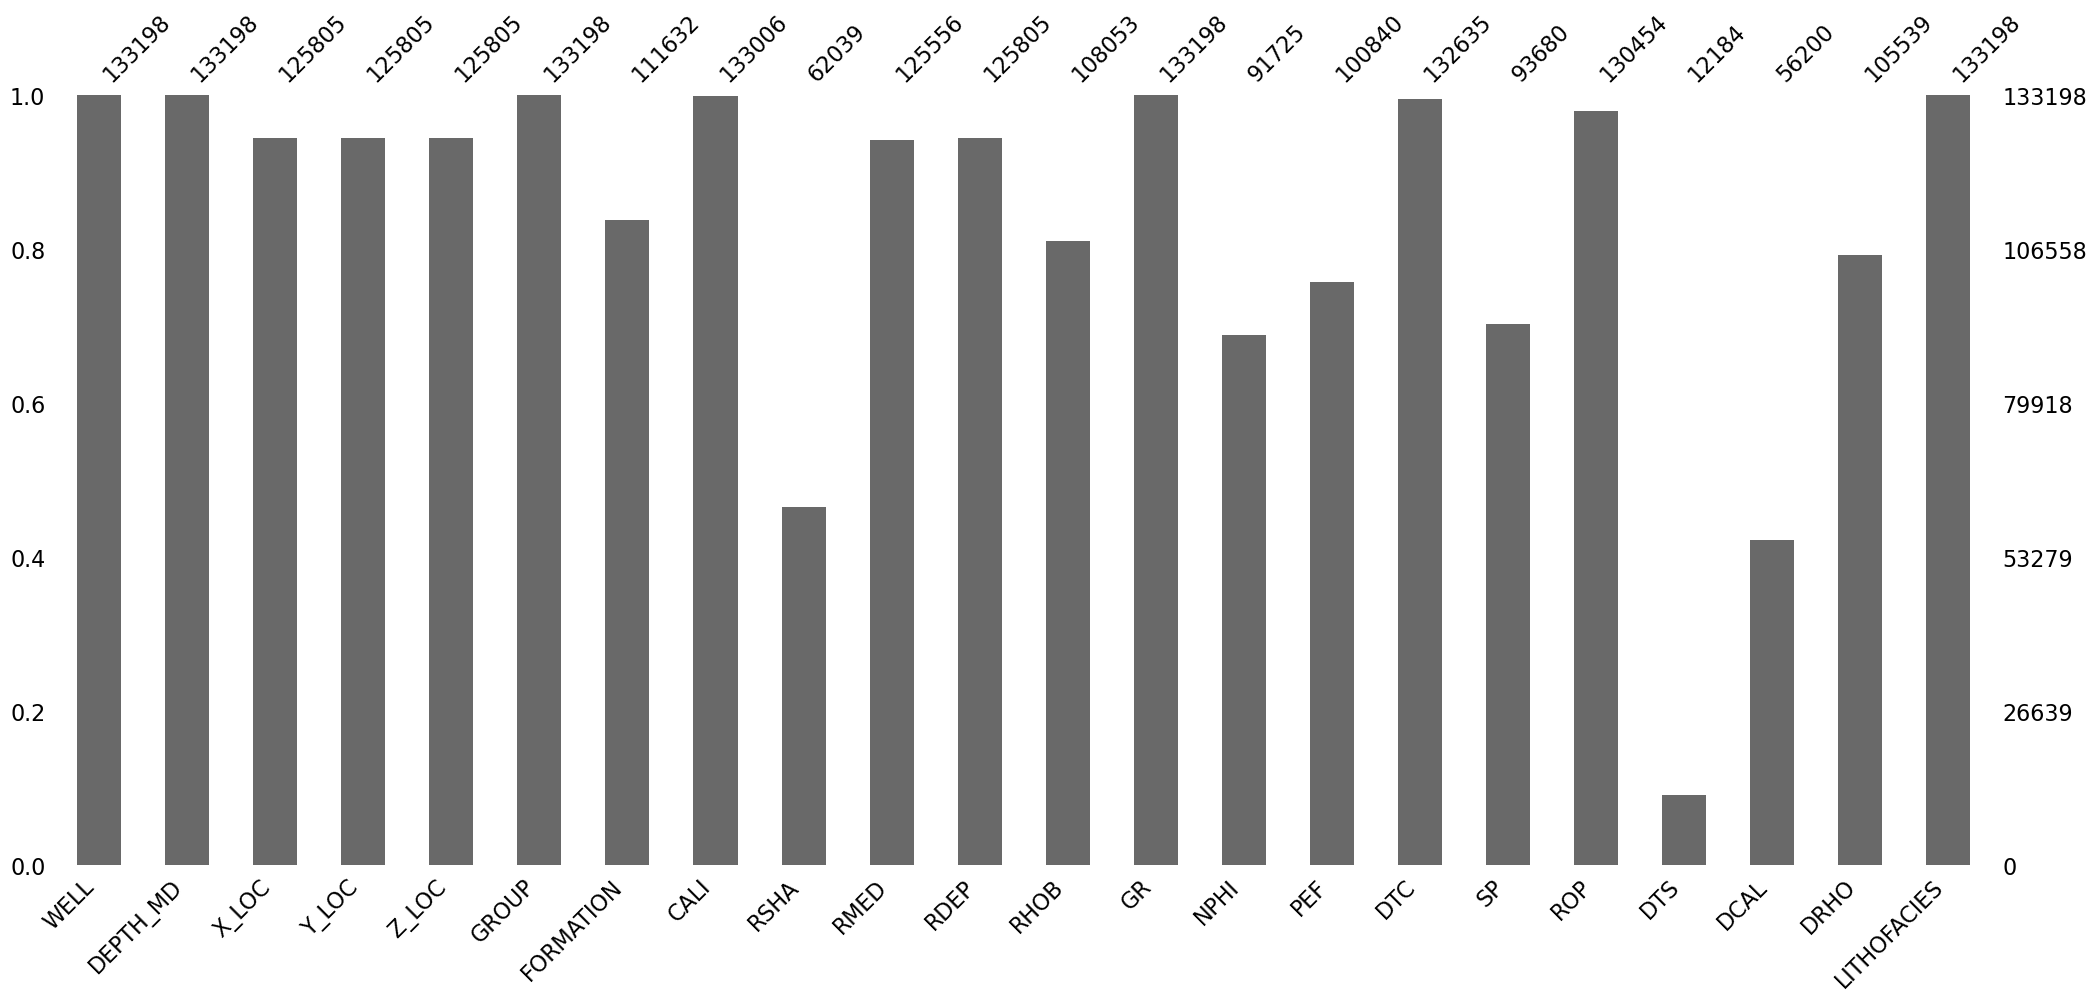

In [13]:
bar=msno.bar(df1)
bar

Basically, this plot displays the number of missing values for each column represented as a bar chart. It’s similar to the matrix plot but simpler to interpret.

In [15]:
# % of values missing in each column
values_list = list()
cols_list = list()
for col in df1.columns:
    pct_missing = np.mean(df1[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)
pct_missing_df1 = pd.DataFrame()
pct_missing_df1['col'] = cols_list
pct_missing_df1['pct_missing'] = values_list


In [16]:
pct_missing_df1

,col,pct_missing
0,WELL,0.000000
1,DEPTH_MD,0.000000
2,X_LOC,5.550384
3,Y_LOC,5.550384
4,Z_LOC,5.550384
5,GROUP,0.000000
6,FORMATION,16.190934
7,CALI,0.144146
8,RSHA,53.423475
9,RMED,5.737323


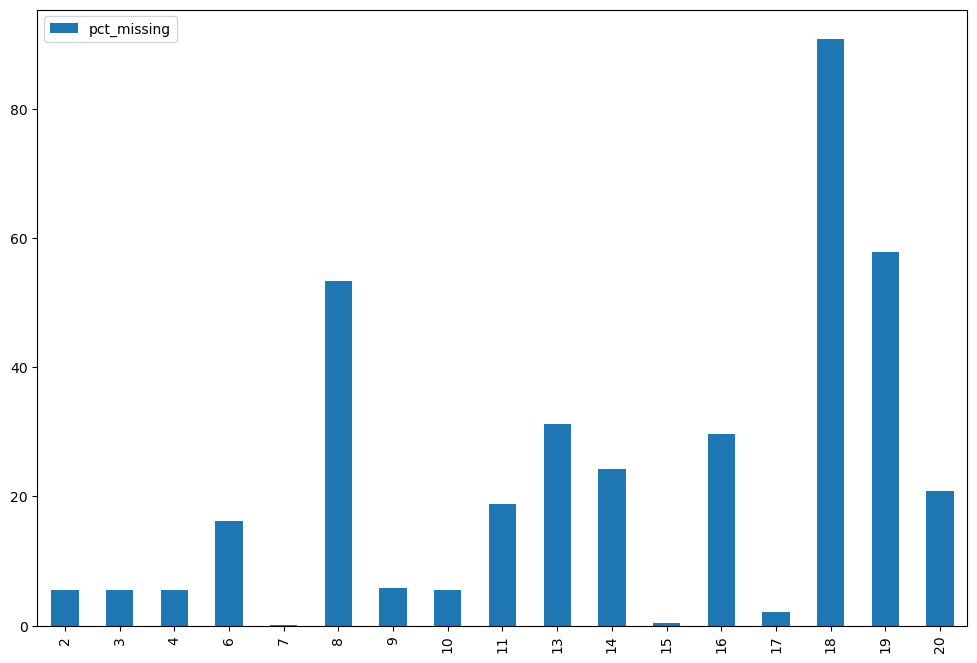

In [18]:
pct_missing_df1.loc[pct_missing_df1.pct_missing > 0].plot(kind='bar', figsize=(12,8))
plt.show()


<AxesSubplot:>

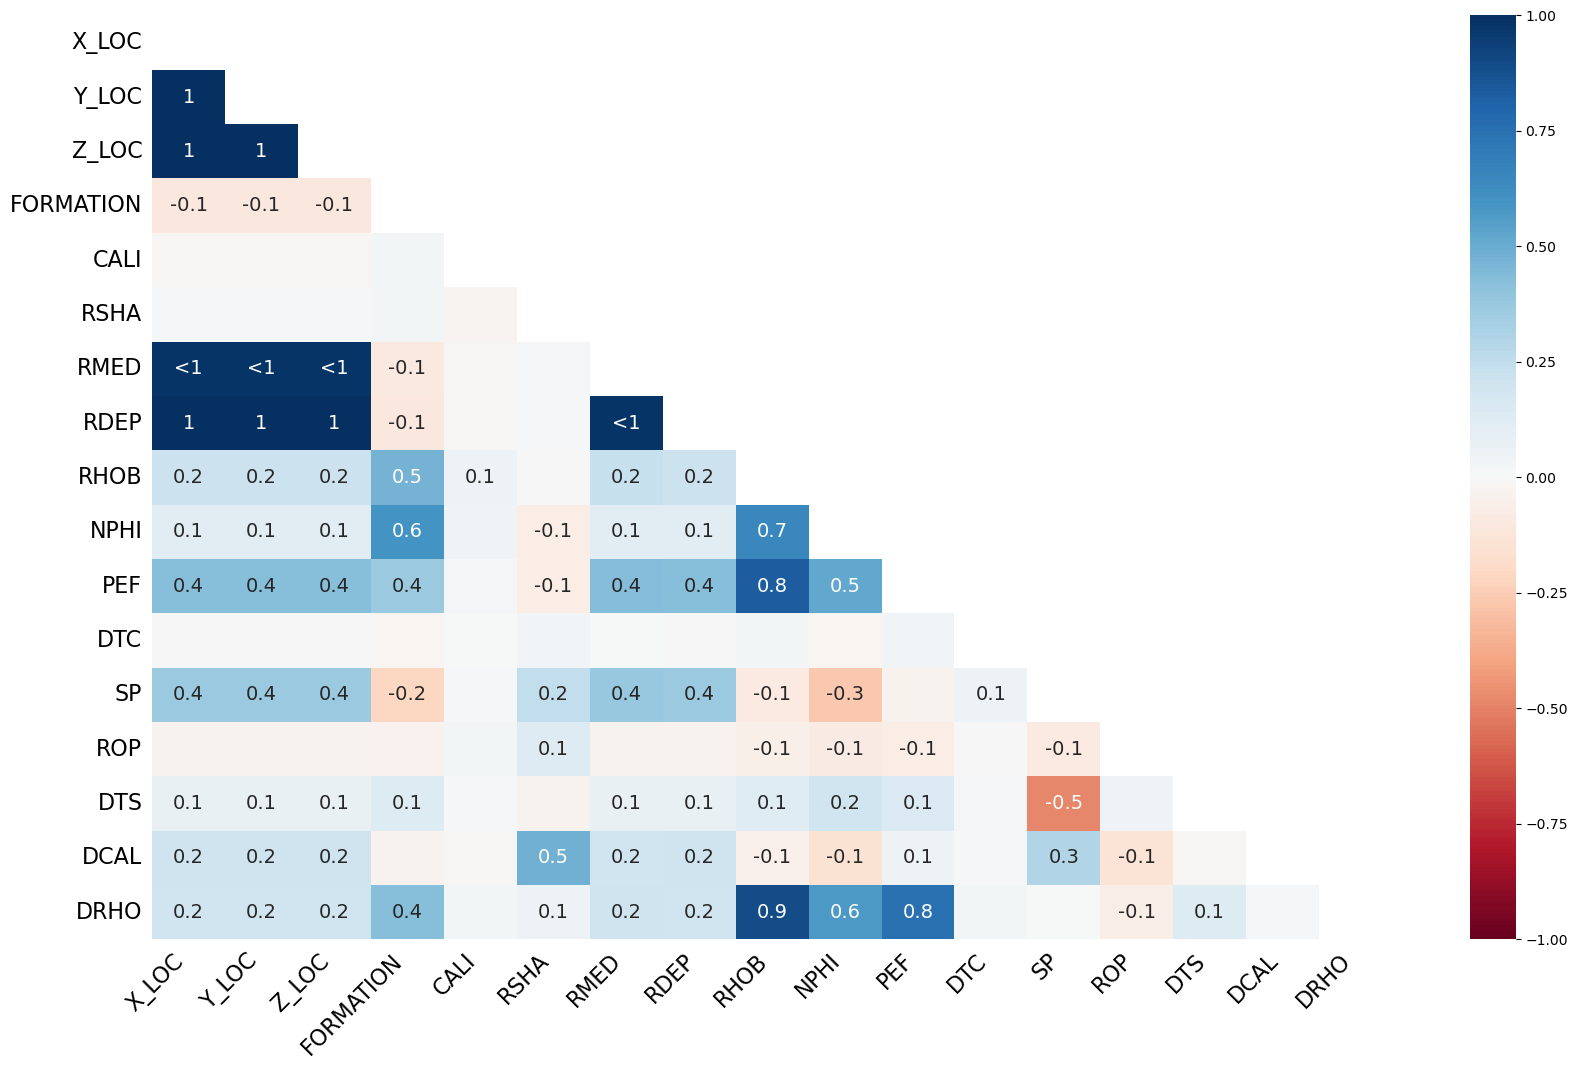

In [ ]:
msno.heatmap(df1)

The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another.


Variables that are always full or always empty are not included in the visualization as they have no significant correlation.


The nullity correlation ranges from -1 to 1.


-1 - Exact Negative correlation represents that if the value of one variable is present then the value of other variables is definitely absent.

0 - No correlation represents that variables values present or absent do not have any effect on one another

1 - Exact Positive correlation represents that if the value of one variable is present then the value of the other is definitely present.

The heatmap works great for picking out data completeness relationships between variable pairs, but its explanatory power is limited when it comes to larger relationships and it has no particular support for extremely large datasets. For those, try the dendrogram instead.

<Axes: >

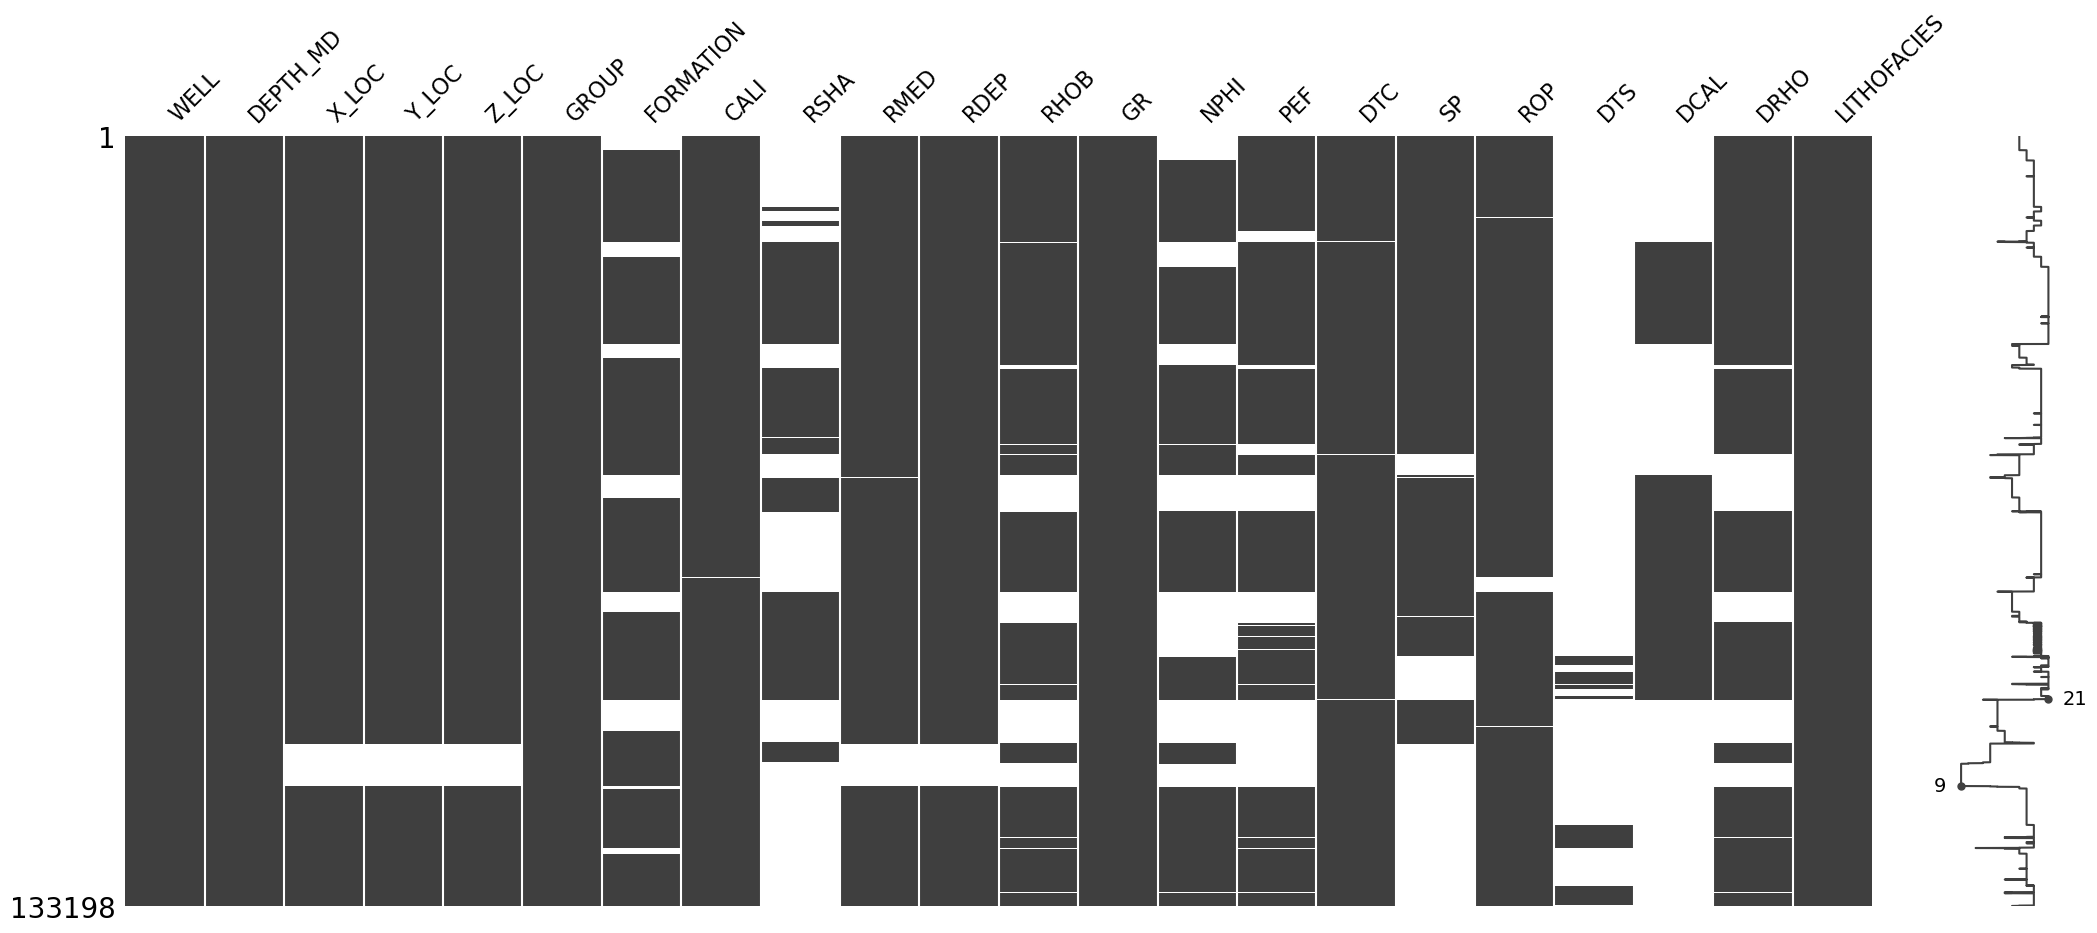

In [ ]:
msno.matrix(df1)

White lines indicate the location of missing values.

The sparkline at right summarizes the general shape of the data completeness and points out the rows with the maximum and minimum nullity in the dataset.

From the sparkline, we can see that there are observations without any missing values and the minimum number of values is 10, even for rows with the maximum nullity.

As you can see from above, we got a matrix-like plot, where each matrix cell color is based on whether the data exists or not.

If the color is dark, the data exists. If the color is white, the data is missing. From this plot, we have a picture of the proportion of missing data inside a row or a column.

<Axes: >

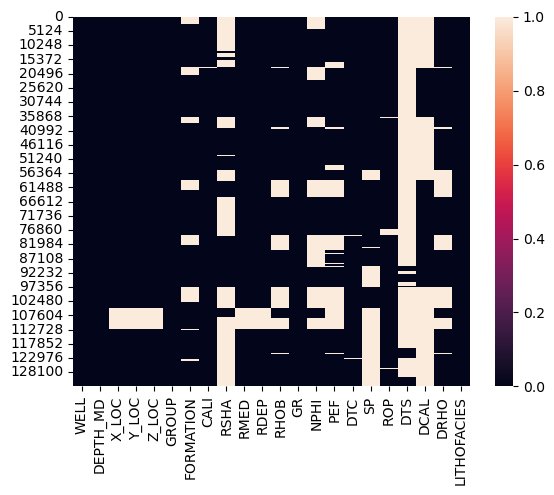

In [20]:
import seaborn as sns
sns.heatmap(df1.isnull())

Well, if the column names are not easily readable you can always create its transposed version as below.

<Axes: >

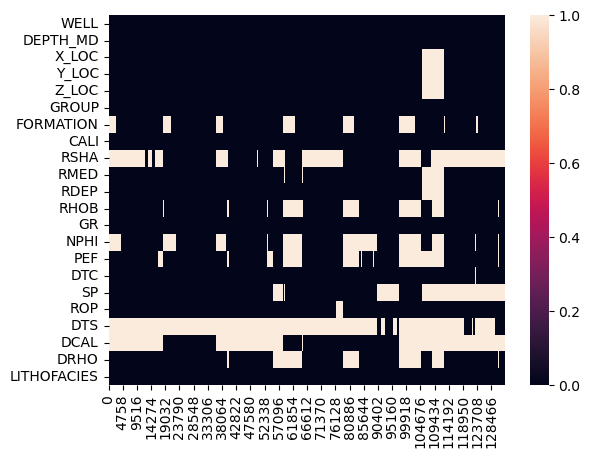

In [21]:
sns.heatmap(df1.isnull().transpose())

Although heatmaps gives you an idea about the location of the missing data, it does not tell you about the amount of missing data

Missing data as a percentage of total data
There is no straightforward method to get it, but all you can use is the .isna() method and below a piece of code

In [ ]:

print("Amount of missing values in - ")
for column in df1.columns:
    percentage_missing = np.mean(df1[column].isna())
    print(f'{column} : {round(percentage_missing*100)}%')

Amount of missing values in - 
WELL : 0%
DEPTH_MD : 0%
X_LOC : 6%
Y_LOC : 6%
Z_LOC : 6%
GROUP : 0%
FORMATION : 16%
CALI : 0%
RSHA : 53%
RMED : 6%
RDEP : 6%
RHOB : 19%
GR : 0%
NPHI : 31%
PEF : 24%
DTC : 0%
SP : 30%
ROP : 2%
DTS : 91%
DCAL : 58%
DRHO : 21%
LITHOFACIES : 0%


<Axes: >

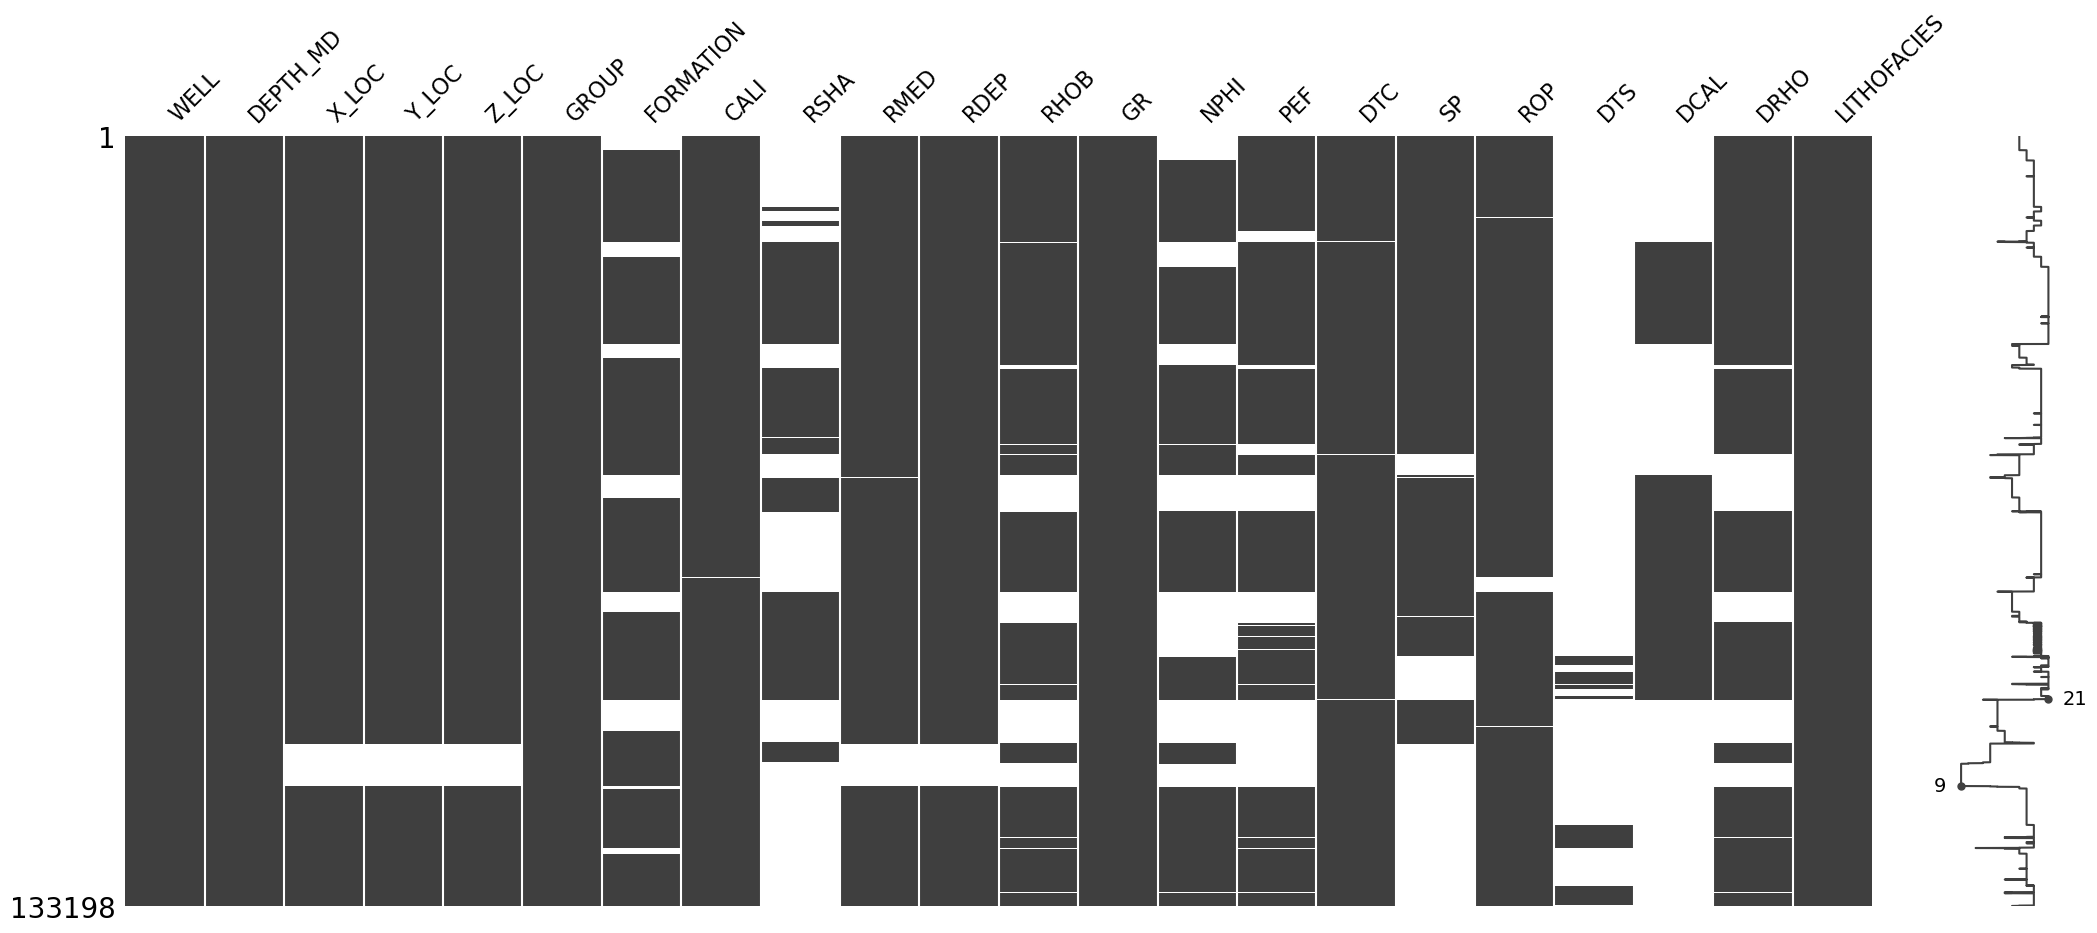

In [22]:
msno.matrix(df1)


In [24]:
df1.dtypes

WELL            object
DEPTH_MD       float64
X_LOC          float64
Y_LOC          float64
Z_LOC          float64
GROUP           object
FORMATION       object
CALI           float64
RSHA           float64
RMED           float64
RDEP           float64
RHOB           float64
GR             float64
NPHI           float64
PEF            float64
DTC            float64
SP             float64
ROP            float64
DTS            float64
DCAL           float64
DRHO           float64
LITHOFACIES      int64
dtype: object

<AxesSubplot:>

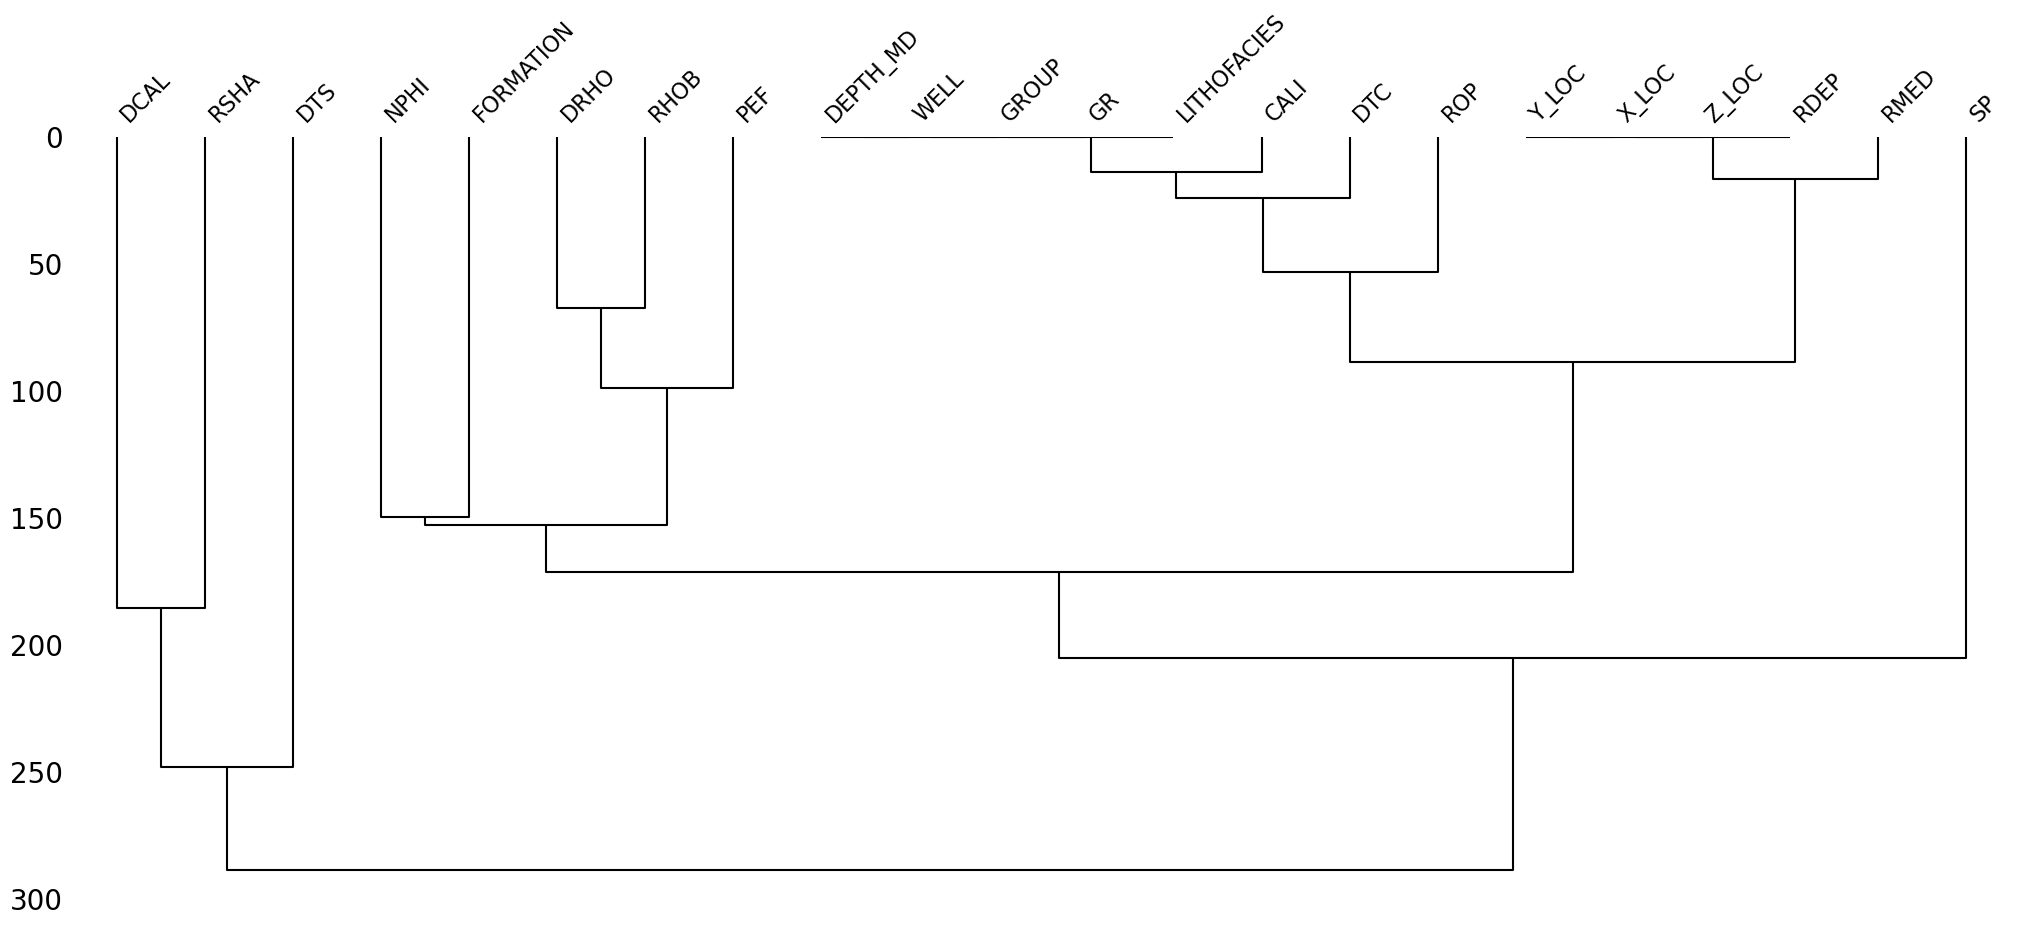

In [ ]:
msno.dendrogram(df1)

a diagram that shows the arrangement of the clusters produced by hierarchical clustering. Hierarchical clustering is a method of cluster analysis which seeks to build a hierarchy of clusters.

In this dendrogram:

Each leaf represents one of the variables, or data points, which in this case appear to be various measurements or parameters likely related to geology or drilling, given the context provided by the labels like "DEPTH_MD", "GR" (possibly Gamma Ray), "DTC" (Delta-T Compressional), "RDEP" (Deep Resistivity), and others.
The height of the branches reflects the distance or dissimilarity between clusters. In other words, the y-axis is a scale of distance or dissimilarity, so clusters that join lower on the scale are more similar to each other than clusters that join higher up.
The algorithm starts by treating each variable as a separate cluster and then progressively merges clusters until only one remains. This is done by calculating the distance between clusters using a specific metric (like Euclidean distance) and linkage criteria (like single, complete, average, etc.).
The point where two branches come together, called a node, represents a cluster. The height of the node (on the y-axis) shows the distance at which the two clusters were joined.

# Treating missing values

#### Based on above observations you can use any of the below 3 methods to handle missing data.

Drop the record — Drop an entire record at an index, when a specific column has a missing value or NaN at it. Please be aware that this technique can drastically reduce the number of records in the dataset if the mentioned column has a huge number of missing values.
Drop the column or feature — This needs good research of a specific column to understand its importance in the future. You can do this only when you are confident that this feature does not provide any useful information, for example, PassengerId feature in this dataset.
Impute missing data—In this technique, you can substitute the missing values or NaNs with the mean or median or mode of the same column.

It is important to keep in mind that imputing missing values with summary statistics like mean, median, or mode can introduce bias in the data, as it assumes that the missing values are similar to the non-missing values. Additionally, the choice of imputation method can also affect the performance of the machine learning model, as it can impact the relationships between variables in the dataset.


Mean imputation is often used when the missing values are numerical and the distribution of the variable is approximately normal.

Median imputation is preferred when the distribution is skewed, as the median is less sensitive to outliers than the mean.

Mode imputation is suitable for categorical variables or numerical variables with a small number of unique values.

## Remove columns (features)
Another way to tackle missing values in a dataset would be to drop those columns or features that have a significant percentage of values missing. Such columns don’t contain a lot of information and can be dropped altogether from the dataset. In our case, let us drop all those columns that have more than 40% values missing in them.

In [ ]:

_40_pct_missing_cols_list = list(pct_missing_df1.loc[pct_missing_df1.pct_missing > 40, 'col'].values)
_40_pct_missing_cols_list

['RSHA', 'DTS', 'DCAL']

In [ ]:
x=pct_missing_df1.dropna(axis=1)
x

,col,pct_missing
0,WELL,0.000000
1,DEPTH_MD,0.000000
2,X_LOC,5.550384
3,Y_LOC,5.550384
4,Z_LOC,5.550384
5,GROUP,0.000000
6,FORMATION,16.190934
7,CALI,0.144146
8,RSHA,53.423475
9,RMED,5.737323


## Using mean
Outliers data points will have a significant impact on the mean and hence, in such cases, it is not recommended to use the mean for replacing the missing values. Using mean values for replacing missing values may not create a great model and hence gets ruled out. For symmetric data distribution, one can use the mean value for imputing missing values.

One of the techniques is mean imputation in which the missing values are replaced with the mean value of the entire feature column. In the case of fields like salary, the data may be skewed as shown in the previous section. In such cases, it may not be a good idea to use mean imputation for replacing the missing values. Note that imputing missing data with mean values can only be done with numerical data.

In [ ]:
df1copy.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC',
       'SP', 'ROP', 'DTS', 'DCAL', 'DRHO', 'LITHOFACIES'],
      dtype='object')

In [ ]:
df1copy['RSHA'].isna().sum()

71159

In [ ]:
df1rsha=df1copy['RSHA'].mean()
df1rsha

10.561825070196184

In [ ]:
df1copy['RSHA']=df1copy['RSHA'].fillna(df1copy['RSHA'].mean())
df1copy['RSHA'].isna().sum()

0

In [ ]:
df1copy['RSHA']
print(df1copy['RSHA'].unique())

[10.56182507  0.2976329   0.269429   ...  2.05331469  2.06634569
  2.08046913]


In [ ]:
df1.mean()

C:\Users\user\AppData\Local\Temp\ipykernel_224\2053335143.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.mean()


DEPTH_MD       1.792945e+03
X_LOC          4.512356e+05
Y_LOC          6.471392e+06
Z_LOC         -1.719215e+03
CALI           1.319940e+01
RSHA           1.056183e+01
RMED           1.708851e+00
RDEP           1.743774e+00
RHOB           2.199556e+00
GR             6.955387e+01
NPHI           3.556019e-01
PEF            4.511845e+00
DTC            1.227003e+02
SP             9.160892e+01
ROP            2.816382e+01
DTS            1.765837e+02
DCAL           9.721649e-01
DRHO           9.306930e-03
LITHOFACIES    6.326158e+04
dtype: float64

In [ ]:
# Impute / Replace Missing Values with Mean
dfmean=df1.fillna(df1.mean())
dfmean

C:\Users\user\AppData\Local\Temp\ipykernel_224\3022332577.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfmean=df1.fillna(df1.mean())


,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,GR,NPHI,PEF,DTC,SP,ROP,DTS,DCAL,DRHO,LITHOFACIES
0,15/09/2013,494.528000,437641.9688,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,10.561825,1.611410,...,80.200851,0.355602,20.915468,161.131180,24.612379,34.636410,176.583712,0.972165,-0.574928,65000
1,15/09/2013,494.680000,437641.9688,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,10.561825,1.618070,...,79.262886,0.355602,19.383013,160.603470,23.895531,34.636410,176.583712,0.972165,-0.570188,65000
2,15/09/2013,494.832000,437641.9688,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,10.561825,1.626459,...,74.821999,0.355602,22.591518,160.173615,23.916357,34.779556,176.583712,0.972165,-0.574245,65000
3,15/09/2013,494.984000,437641.9688,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,10.561825,1.621594,...,72.878922,0.355602,32.191910,160.149429,23.793688,39.965164,176.583712,0.972165,-0.586315,65000
4,15/09/2013,495.136000,437641.9688,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,10.561825,1.602679,...,71.729141,0.355602,38.495632,160.128342,24.104078,57.483765,176.583712,0.972165,-0.597914,65000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133193,16/02/2016,2207.310396,476770.1250,6523587.5,-2180.926514,ROTLIEGENDES GP.,Skagerrak Fm.,8.698007,10.561825,5.382444,...,127.456139,0.355602,3.607062,122.700286,91.608922,22.291321,176.583712,0.972165,0.107520,30000
133194,16/02/2016,2207.462396,476770.1563,6523587.5,-2181.078613,ROTLIEGENDES GP.,Skagerrak Fm.,8.721210,10.561825,5.651109,...,128.403305,0.355602,3.609151,122.700286,91.608922,22.230320,176.583712,0.972165,0.101821,30000
133195,16/02/2016,2207.614396,476770.1563,6523587.5,-2181.230469,ROTLIEGENDES GP.,Skagerrak Fm.,8.739136,10.561825,5.870602,...,127.829262,0.355602,3.594580,122.700286,91.608922,22.388054,176.583712,0.972165,0.097832,30000
133196,16/02/2016,2207.766396,476770.1563,6523587.5,-2181.382324,ROTLIEGENDES GP.,Skagerrak Fm.,8.749738,10.561825,5.756996,...,126.552277,0.355602,3.534883,122.700286,91.608922,23.331690,176.583712,0.972165,0.092334,30000


## Impute / Replace Missing Values with Median
Another technique is median imputation in which the missing values are replaced with the median value of the entire feature column. When the data is skewed, it is good to consider using the median value for replacing the missing values. Note that imputing missing data with median value can only be done with numerical data

In [ ]:
#dfmedian=df.fillna(df.median())

df1copy

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,GR,NPHI,PEF,DTC,SP,ROP,DTS,DCAL,DRHO,LITHOFACIES
0,15/09/2013,494.528000,437641.9688,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,10.561825,1.611410,...,80.200851,NaN,20.915468,161.131180,24.612379,34.636410,NaN,NaN,-0.574928,65000
1,15/09/2013,494.680000,437641.9688,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,10.561825,1.618070,...,79.262886,NaN,19.383013,160.603470,23.895531,34.636410,NaN,NaN,-0.570188,65000
2,15/09/2013,494.832000,437641.9688,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,10.561825,1.626459,...,74.821999,NaN,22.591518,160.173615,23.916357,34.779556,NaN,NaN,-0.574245,65000
3,15/09/2013,494.984000,437641.9688,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,10.561825,1.621594,...,72.878922,NaN,32.191910,160.149429,23.793688,39.965164,NaN,NaN,-0.586315,65000
4,15/09/2013,495.136000,437641.9688,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,10.561825,1.602679,...,71.729141,NaN,38.495632,160.128342,24.104078,57.483765,NaN,NaN,-0.597914,65000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133193,16/02/2016,2207.310396,476770.1250,6523587.5,-2180.926514,ROTLIEGENDES GP.,Skagerrak Fm.,8.698007,10.561825,5.382444,...,127.456139,NaN,3.607062,NaN,NaN,22.291321,NaN,NaN,0.107520,30000
133194,16/02/2016,2207.462396,476770.1563,6523587.5,-2181.078613,ROTLIEGENDES GP.,Skagerrak Fm.,8.721210,10.561825,5.651109,...,128.403305,NaN,3.609151,NaN,NaN,22.230320,NaN,NaN,0.101821,30000
133195,16/02/2016,2207.614396,476770.1563,6523587.5,-2181.230469,ROTLIEGENDES GP.,Skagerrak Fm.,8.739136,10.561825,5.870602,...,127.829262,NaN,3.594580,NaN,NaN,22.388054,NaN,NaN,0.097832,30000
133196,16/02/2016,2207.766396,476770.1563,6523587.5,-2181.382324,ROTLIEGENDES GP.,Skagerrak Fm.,8.749738,10.561825,5.756996,...,126.552277,NaN,3.534883,NaN,NaN,23.331690,NaN,NaN,0.092334,30000


In [ ]:
print(df1copy['DTC'].max())
print(df1copy['DTC'].min())
print(df1copy['DTC'].unique())
print(df1copy['DTC'].nunique())

230.4329529
7.415132046
[161.1311798  160.6034699  160.1736145  ...  70.4621582   70.33759308
  70.00798035]
130456


## Impute / Replace Missing Values with Mode
Yet another technique is mode imputation in which the missing values are replaced with the mode value or most frequent value of the entire feature column. When the data is skewed, it is good to consider using mode values for replacing the missing values. For data points such as the salary field, you may consider using mode for replacing the values. Note that imputing missing data with mode values can be done with numerical and categorical data.

In [ ]:
#categorical column
for columns in df:
    df[columns] = df[columns].fillna(df[columns].mode()[0])

print(df.isna().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,20.05,151.65,Yes
5,9305-CDSKC,Female,0.0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0.0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0.0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0.0,Yes,No,28,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,No
9,6388-TABGU,Male,0.0,No,No,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Removing Rows with Null Values

In [ ]:
dfremoved = df.dropna(axis=0)
dfremoved.shape

(7043, 21)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## Replacing with the previous value – forward fill
In some cases, imputing the values with the previous value instead of the mean, mode, or median is more appropriate. This is called forward fill. It is mostly used in time series data. You can use the ‘fillna’ function with the parameter ‘method = ffill’

In [ ]:
df1copy.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC',
       'SP', 'ROP', 'DTS', 'DCAL', 'DRHO', 'LITHOFACIES'],
      dtype='object')

In [ ]:
df1copy.FORMATION=df1copy.FORMATION.fillna('ffill')
df1copy.FORMATION.isnull().sum()

0

## Replacing with the next value – backward fill

In backward fill, the missing value is imputed using the next value.

In [ ]:
df1copy.ROP=df1copy.ROP.fillna('bfill')
df1copy.ROP.isnull().sum()

0

# Date Time formating

Example 1: Get Current Date and Time

In [ ]:
import datetime

# get the current date and time
now = datetime.datetime.now()

print(now)

2023-12-13 15:27:52.974495


In [ ]:
#Example 2: Get Current Date


# get current date
current_date = datetime.date.today()

print(current_date)

2023-12-13


Attributes of datetime Module
We can use the dir() function to get a list containing all attributes of a module.

Among all the attributes of datetime module, the most commonly used classes in the datetime module are:

datetime.datetime - represents a single point in time, including a date and a time.

datetime.date - represents a date (year, month, and day) without a time.

datetime.time - represents a time (hour, minute, second, and microsecond) without a date.

datetime.timedelta - represents a duration, which can be used to perform arithmetic with datetime objects.
https://www.programiz.com/python-programming/datetime

In [ ]:
import datetime

print(dir(datetime))

['MAXYEAR', 'MINYEAR', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'date', 'datetime', 'datetime_CAPI', 'sys', 'time', 'timedelta', 'timezone', 'tzinfo']


In [ ]:
# Print today's year, month and day
from datetime import date

# date object of today's date
today = date.today()

print("Current year:", today.year)
print("Current month:", today.month)
print("Current day:", today.day)

Current year: 2023
Current month: 12
Current day: 13


In [ ]:
from datetime import datetime

a = datetime(2022, 12, 28, 23, 55, 59, 342380)

print("Year =", a.year)
print("Month =", a.month)
print("Hour =", a.hour)
print("Minute =", a.minute)
print("Timestamp =", a.timestamp())

Year = 2022
Month = 12
Hour = 23
Minute = 55
Timestamp = 1672253759.34238


### Python format datetime
Python strftime() Method

The strftime() method is defined under classes date, datetime and time. The method creates a formatted string from a given date, datetime or time object.

In [ ]:
from datetime import datetime

# current date and time
now = datetime.now()

t = now.strftime("%H:%M:%S")
print("Time:", t)

s1 = now.strftime("%m/%d/%Y, %H:%M:%S")
# mm/dd/YY H:M:S format
print("s1:", s1)

s2 = now.strftime("%d/%m/%Y, %H:%M:%S")
# dd/mm/YY H:M:S format
print("s2:", s2)

Time: 15:31:56
s1: 12/13/2023, 15:31:56
s2: 13/12/2023, 15:31:56


# Label Encoding
A machine learning algorithm needs to be able to understand the data it receives. For example, categories such as “small”, “medium”, and “large” need to be converted into numbers.


To discover them, we will see the following ways to encode categorical variables:


One-hot/dummy encoding

Label / Ordinal encoding

Frequency / count encoding

Binary encoding

https://towardsdatascience.com/6-ways-to-encode-features-for-machine-learning-algorithms-21593f6238b0

## One-Hot / Dummy Encoding
In one-hot encoding, categorical data are represented as vectors of zeros and ones. This is done by using a separate dummy variable for each category, and setting the value of the dummy variable to 1 if the observation belongs to that category and 0 otherwise.

For instance, if there are three categories, each category can be represented as a vector of zeros with a single one in the position corresponding to the category.

https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/

In [ ]:
import pandas as pd
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
1466,1467,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
1467,1468,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
1468,1469,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8


In [ ]:

one_hot_encoded_data = pd.get_dummies(df, columns = ['Department'])
one_hot_encoded_data

,Index,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales
0,1,41,Yes,Travel_Rarely,1102,1,2,Life Sciences,1,1,...,8,0,1,6,4,0,5,0,0,1
1,2,49,No,Travel_Frequently,279,8,1,Life Sciences,1,2,...,10,3,3,10,7,1,7,0,1,0
2,3,37,Yes,Travel_Rarely,1373,2,2,Other,1,4,...,7,3,3,0,0,0,0,0,1,0
3,4,33,No,Travel_Frequently,1392,3,4,Life Sciences,1,5,...,8,3,3,8,7,3,0,0,1,0
4,5,27,No,Travel_Rarely,591,2,1,Medical,1,7,...,6,3,3,2,2,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,36,No,Travel_Frequently,884,23,2,Medical,1,2061,...,17,3,3,5,2,0,3,0,1,0
1466,1467,39,No,Travel_Rarely,613,6,1,Medical,1,2062,...,9,5,3,7,7,1,7,0,1,0
1467,1468,27,No,Travel_Rarely,155,4,3,Life Sciences,1,2064,...,6,0,3,6,2,0,3,0,1,0
1468,1469,49,No,Travel_Frequently,1023,2,3,Medical,1,2065,...,17,3,2,9,6,0,8,0,0,1


## Label / Ordinal Encoding
This is probably the simplest way to encode features for a machine learning algorithm. In this method, the categorical data is converted into numerical data. Each category is assigned a numerical value.

https://www.scaler.com/topics/data-science/ordinal-encoding/

The ordinal encoding technique has been applied to the 'Education' column of the dataset. In ordinal encoding, each unique value in the column is assigned an integer value based on its order.

each level of education is replaced by an integer. For instance, 'Education' level 2 is encoded as 1.0, level 1 as 0.0, and so on. The encoding reflects the ordinal nature of the 'Education' column, where the values have a specific order

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Ordinal encoding of the 'Education' column
ordinal_encoder = OrdinalEncoder()

# Reshape the data since OrdinalEncoder expects 2D input
education_reshaped = df['Education'].values.reshape(-1, 1)

# Fit and transform the data
df['Education_Ordinal_Encoded'] = ordinal_encoder.fit_transform(education_reshaped)

# Display the first few rows to show the encoded column
df[['Education', 'Education_Ordinal_Encoded']].head()



,Education,Education_Ordinal_Encoded
0,2,1.0
1,1,0.0
2,2,1.0
3,4,3.0
4,1,0.0


## Frequency / Count Encoding
Count encoding is a way of representing categorical data using the count of the categories. Frequency encoding is simply a normalized version of count encoding.

In [ ]:
# Frequency encoding of the 'Department' column

# Calculate the frequency of each category in the 'Department' column
frequency = df['Department'].value_counts()
print(frequency)
# Map the frequencies to the original data
df['Department_Freq_Encoded'] = df['Department'].map(frequency)

# Display the first few rows to show the encoded column
df[['Department', 'Department_Freq_Encoded']].head()


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


,Department,Department_Freq_Encoded
0,Sales,446
1,Research & Development,961
2,Research & Development,961
3,Research & Development,961
4,Research & Development,961


Frequency or count encoding is a feature engineering technique used in machine learning to replace categorical values with a count of the number of times each category appears in the dataset. Instead of using a one-hot encoding that creates a new column for each category, a single column is retained, and each category is encoded based on its frequency or count.


### Here's a breakdown of how it works:


Calculate Frequency: For each category in the feature column, calculate the number of times it appears in the dataset.

Replace Categories with Frequencies: Replace the categorical values with their corresponding frequencies.

When to Use Frequency/Count Encoding:

High Cardinality: When the categorical feature has a large number of unique values (high cardinality), one-hot encoding can lead to a massive increase in the dataset's dimensionality, which can be problematic for certain models. Frequency encoding helps to keep the feature space manageable.

Ordinal Relationship: When the frequency of the categories may have an ordinal relationship with the target variable. For instance, in some datasets, more frequent categories may have more significance.

Memory Efficiency: When you need a memory-efficient way to handle categorical variables because one-hot encoding would create too many additional features.


When Not to Use:
Loss of Information: If the individual categories have importance in themselves, frequency encoding can lead to a loss of information since multiple categories might have the same frequency.

Collision: Different categories might end up with the same count, and hence the model will interpret them as being the same, which can introduce noise.

## Binary encoding

Binary encoding is a technique used to transform categorical data into numerical data by encoding categories as integers and then converting them into binary code.



When to use Binary Encoder

Nominal Variables: Binary and BaseN Encoder are used for nominal categorical variables

High Cardinality: Binary and BaseN encoding works well with a high number of categories

Missing or Unseen Variables: Binary and BaseN Encoder can handle unseen variables by encoding them with 0 values across all columns


In [ ]:
# Binary encoding of the 'Attrition' column using an alternative method

# Define a mapping from categories to binary values
attrition_mapping = {'Yes': 1, 'No': 0}

# Apply the mapping to the 'Attrition' column
df['Attrition_Binary_Encoded'] = df['Attrition'].map(attrition_mapping)

# Display the first few rows to show the encoded column
df[['Attrition', 'Attrition_Binary_Encoded']].head()


,Attrition,Attrition_Binary_Encoded
0,Yes,1
1,No,0
2,Yes,1
3,No,0
4,No,0


binary encoding using an alternative approach. For the 'Attrition' column, which likely contains categorical data like 'Yes' and 'No', binary encoding can be achieved by mapping these categories to binary values. Let's proceed with this method. ​​

The binary encoding has been successfully applied to the 'Attrition' column of the dataset using a manual mapping method. In this approach, the categories 'Yes' and 'No' are mapped to binary values 1 and 0, respectively.